# Доказательство центральной предельной теоремы

In [2]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

 Выбор параметров для распределения - распределение Пуассона 

Работа Симеона Дени Пуассона «Исследования о вероятности приговоров в уголовных и гражданских делах»[2], в которой было введено данное распределение, была опубликована в 1837 году[3]. Примеры других ситуаций, которые можно смоделировать, применив это распределение: поломки оборудования, длительность исполнения ремонтных работ стабильно работающим сотрудником, ошибка печати, рост колонии бактерий в чашке Петри, дефекты в длинной ленте или цепи, импульсы счетчика радиоактивного излучения, количество забиваемых футбольной командой голов и др.[4] 

In [3]:
l = 5 
NewRange = sts.poisson.rvs(l, size=1000)

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

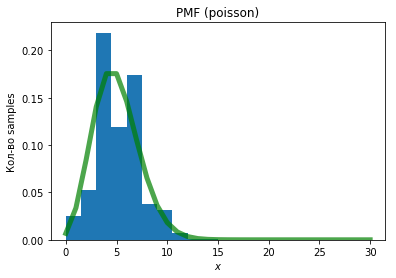

In [4]:
#Построeм гистограмму выборки и нарисуем поверх неё теоретическую плотность распределения случайной величины. 
plt.hist(NewRange, normed=True,label=' Samples Poisson') 
plt.title("Poisson")
plt.ylabel('Кол-во samples') 
plt.xlabel('$x$') 
#теоретическая плотность распределения случайной величины 
plt.title("PMF (poisson)")

x = np.linspace(0,30,31)
plt.plot(x, sts.poisson.pmf(x, l), 'g-', lw=5, alpha=0.7, label='poisson PMF')

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

In [19]:
def poisson_generator(size, L, Sig): 
    n = size
    #генерация выборок 
    data_values = np.array([sts.poisson.rvs(l, size=n) for x in range(1000)]) 
    #вычисление выборочных средних 
    MeanValue = data_values.mean(axis = 1) 
    plt.hist(MeanValue, normed=True, alpha=0.5, label='среднее значение (n) ' + str(n)) 
     
    #мат. ожидание и дисперсия  нормального распределения 
    mat= L 
    dis = math.sqrt(Sig/n) 
    print ('математическое ожидание=' , mat )
    print ('sigma=' , dis)
    # зададим нормальное распределенние 
    normal_rv = sts.norm(loc=mat, scale=dis) 
    x = np.linspace(0.5,10,100) 
    pdf = normal_rv.pdf(x) 
    plt.plot(x, pdf, 'g-', lw=3, alpha=0.7, label='плотность распределения n ' + str(n)) 
    plt.ylabel('samples') 
    plt.xlabel('$x$') 
    plt.legend(loc='best') 


In [20]:
#Вычисление теоретических стредних и дисперсию распределения Пуассона
L = sts.poisson.mean(l) 
std = sts.poisson.std(l) 
Sig = std**2 
print ('L=', L, ' STD=', std, ' Sig=', Sig)

L= 5.0  STD= 2.2360679775  Sig= 5.0


математическое ожидание= 5.0
sigma= 1.0


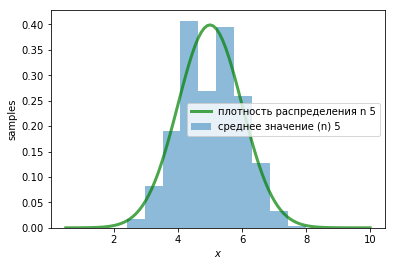

In [21]:
poisson_generator(5, L, Sig)

математическое ожидание= 5.0
sigma= 0.7071067811865476


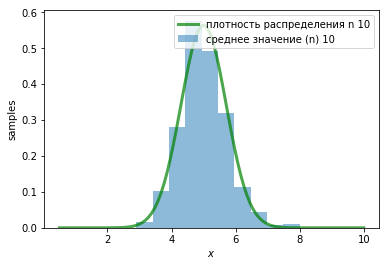

In [22]:
poisson_generator(10, L, Sig)

математическое ожидание= 5.0
sigma= 0.31622776601683794


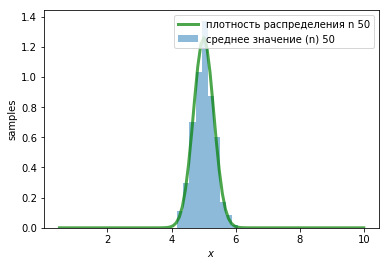

In [24]:
poisson_generator(50, L, Sig)

Вывод: Распределение выборочных средних для функции Poisson хорошо описывается нормальным распределением. 
при росте n точность аппроксимации увеличивается 
